In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

# 1. Uploading datasets
The most relevant, open-source and reliable dataset source is Earnings Analysis using Administrative Data Sources (EAADS), which links earnings from administrative sources to Labour Force Survey National Minimum Wage Estimates data. The data are administered by the Central Statistics Office (CSO) in Ireland.

### 1.1. Education level
The dataset of Education level is the total number of Employees aged 15 years and over from the second quarter of 2016 to the third quarter of 2020. This dataset involves all level of the education level of the Total employees, Employees reporting earning National Minimum Wage or less and Employees reporting earning more than National Minimum Wage. Also, the type of the education level is “Primary or below”, “Lower secondary”, “post-secondary non-tertiary”, “Third level non-honours degree”, “Third level honours degree or higher” and “Higher secondary”.

In [2]:
# Dataset by education level
df_education= pd.read_csv("MWA27.20230614T090606.csv")
df_education

,Statistic Label,Education Level,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
571,Employees aged 15 years and over,Other/not stated,Total employees,2019Q3,Thousand,58.3
572,Employees aged 15 years and over,Other/not stated,Total employees,2019Q4,Thousand,56.5
573,Employees aged 15 years and over,Other/not stated,Total employees,2020Q1,Thousand,57.0
574,Employees aged 15 years and over,Other/not stated,Total employees,2020Q2,Thousand,38.5


In [3]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Statistic Label      576 non-null    object 
 1   Education Level      576 non-null    object 
 2   NMW earnings status  576 non-null    object 
 3   Quarter              576 non-null    object 
 4   UNIT                 576 non-null    object 
 5   VALUE                564 non-null    float64
dtypes: float64(1), object(5)
memory usage: 27.1+ KB


The "VALUE" of this dataset is the number of total employees.

In [4]:
df_education.describe()

,VALUE
count,564.000000
mean,243.398050
std,439.083136
min,3.900000
25%,19.150000
50%,52.650000
75%,219.025000
max,2018.100000


### 1.2. Nationality

The Nationalities of the total number which are Employees aged 15 years and over from the second quarter of 2016 to the fourth quarter of 2019. The dataset involves the Nationalities of the Total employees, Employees reporting earning National Minimum Wage or less and Employees reporting earning more than National Minimum Wage. Moreover, the dataset is six different categories of the Nationalities which are “Irish nationals”, “non-Irish nationals”, “United Kingdom”, “EU 15 excl. Irl. & UK”, “EU15 to EU28” and “Other nationals”.

In [5]:
# Dataset by nationality
df_nat=pd.read_csv("MWA25.20230614T090635.csv")
df_nat

,Statistic Label,Nationality,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
415,Employees aged 15 years and over,Other nationals,Total employees,2018Q4,Thousand,118.0
416,Employees aged 15 years and over,Other nationals,Total employees,2019Q1,Thousand,121.2
417,Employees aged 15 years and over,Other nationals,Total employees,2019Q2,Thousand,129.7
418,Employees aged 15 years and over,Other nationals,Total employees,2019Q3,Thousand,132.8


In [6]:
df_nat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Statistic Label      420 non-null    object 
 1   Nationality          420 non-null    object 
 2   NMW earnings status  420 non-null    object 
 3   Quarter              420 non-null    object 
 4   UNIT                 420 non-null    object 
 5   VALUE                362 non-null    float64
dtypes: float64(1), object(5)
memory usage: 19.8+ KB


In [7]:
df_nat.describe()

,VALUE
count,362.000000
mean,340.763536
std,575.056338
min,4.200000
25%,35.700000
50%,99.150000
75%,193.075000
max,2018.100000


### 1.3. A Weekly Usual worked hours
The proposed dependent variable of worked hours datasets was generated by weekly usual worked hours of employees who has aged 15 years and over from the second quarter of 2016 to the third quarter of 2020 with the national minimum wage earnings status. Also, the dataset provides information of employees who is earning more than National Minimum Wage.

In [8]:
# Dataset by worked hours
df_hours=pd.read_excel("MWA15.20230614T0906044.xlsx")
df_hours

,Statistic Label,NMW earnings status,Usual Hours Worked,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q2,Thousand,16.6
1,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q3,Thousand,12.2
2,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q4,Thousand,15.3
3,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q1,Thousand,13.7
4,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q2,Thousand,13.3
...,...,...,...,...,...,...
283,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2019Q3,Thousand,46.8
284,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2019Q4,Thousand,47.3
285,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2020Q1,Thousand,41.3
286,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2020Q2,Thousand,30.8


In [9]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Statistic Label      288 non-null    object 
 1   NMW earnings status  288 non-null    object 
 2   Usual Hours Worked   288 non-null    object 
 3   Quarter              288 non-null    object 
 4   UNIT                 288 non-null    object 
 5   VALUE                284 non-null    float64
dtypes: float64(1), object(5)
memory usage: 13.6+ KB


In [10]:
df_hours.describe()

,VALUE
count,284.000000
mean,112.002465
std,162.866112
min,4.200000
25%,17.000000
50%,31.700000
75%,125.350000
max,641.600000


### 1.4. NACE Economic Sector 
NACE (Nomenclature of Economic Activities) is the European statistical classification of economic activities. NACE groups organizations according to their business activities. The dataset of those economic sectors was combined the total number of Employees aged 15 years and over from the second quarter of 2016 to the third quarter of 2020 with the national minimum wage earnings status.

In [11]:
# Dataset by economic sector
df_sector=pd.read_csv("MWA07.csv")
df_sector

,Statistic Label,NACE Rev 2 Economic Sector,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
1291,Employees aged 15 years and over,Not stated,Total employees,2019Q3,Thousand,5.3
1292,Employees aged 15 years and over,Not stated,Total employees,2019Q4,Thousand,5.9
1293,Employees aged 15 years and over,Not stated,Total employees,2020Q1,Thousand,NaN
1294,Employees aged 15 years and over,Not stated,Total employees,2020Q2,Thousand,NaN


In [12]:
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Statistic Label             1296 non-null   object 
 1   NACE Rev 2 Economic Sector  1296 non-null   object 
 2   NMW earnings status         1296 non-null   object 
 3   Quarter                     1296 non-null   object 
 4   UNIT                        1296 non-null   object 
 5   VALUE                       1094 non-null   float64
dtypes: float64(1), object(5)
memory usage: 60.9+ KB


In [13]:
df_sector.describe()

,VALUE
count,1094.000000
mean,186.669835
std,385.207348
min,3.000000
25%,14.325000
50%,84.500000
75%,147.275000
max,2018.100000


# 2. Data preparation and Visualisation

## **2.1. Usual Worked Hours**
The data preparation process began with converting the date to a datetime format which was originally in an object type. This converting process was necessary because all dataset’s “Quarter” variables contain the unique time values. The correct datetime formats allows to process feature engineering, handling missing data and visualization.

In [14]:
# Convert to datetime objects
year_quarter_dates = [pd.Period(quarter, freq='Q') for quarter in df_hours['Quarter']]
dates = [qd.to_timestamp() for qd in year_quarter_dates]

df_hours["Quarter(hours)"]=dates
# Print the converted dates
print(df_hours["Quarter(hours)"].head())

0   2016-04-01
1   2016-07-01
2   2016-10-01
3   2017-01-01
4   2017-04-01
Name: Quarter(hours), dtype: datetime64[ns]


In [15]:
df_hours.head()

,Statistic Label,NMW earnings status,Usual Hours Worked,Quarter,UNIT,VALUE,Quarter(hours)
0,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q2,Thousand,16.6,2016-04-01
1,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q3,Thousand,12.2,2016-07-01
2,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q4,Thousand,15.3,2016-10-01
3,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q1,Thousand,13.7,2017-01-01
4,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q2,Thousand,13.3,2017-04-01


Next step is dropping irrelevant rows from each columns of the datasets. Because as mentioned earlier, the datasets contained a significant amount of irrelevant information. For instance, the counts of workers earning more than National Minimum Wage workers, “Not stated” entries, “Total employees”, All NACE economic sectors, among others. 

In [16]:
# Drop rows where "NMW earnings status" is "Total employees", "Employees reporting earning more than National Minimum Wage", "Variable hours (see note)"  or "Not Stated"
df_h = df_hours.drop(df_hours[(df_hours["NMW earnings status"] == "Employees reporting earning more than National Minimum Wage") 
                           | (df_hours["NMW earnings status"] == "Total employees") 
                           | (df_hours["Usual Hours Worked"] == "Variable hours (see note)") 
                           | (df_hours["NMW earnings status"] == "Total employees") 
                           | (df_hours["NMW earnings status"] == "Not stated")].index)
df_h.head()

,Statistic Label,NMW earnings status,Usual Hours Worked,Quarter,UNIT,VALUE,Quarter(hours)
0,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q2,Thousand,16.6,2016-04-01
1,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q3,Thousand,12.2,2016-07-01
2,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q4,Thousand,15.3,2016-10-01
3,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q1,Thousand,13.7,2017-01-01
4,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q2,Thousand,13.3,2017-04-01


In [17]:
# Check for missing values in the DataFrame
missing_values = df_h.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Statistic Label        0
NMW earnings status    0
Usual Hours Worked     0
Quarter                0
UNIT                   0
VALUE                  4
Quarter(hours)         0
dtype: int64


In [18]:
# Drop rows with missing values
df_h = df_h.dropna()
df_h.shape

(122, 7)

In [19]:
# to change the name of the 'VALUE' column
df_h.rename(columns={'VALUE': 'VALUE(hours)'}, inplace=True)

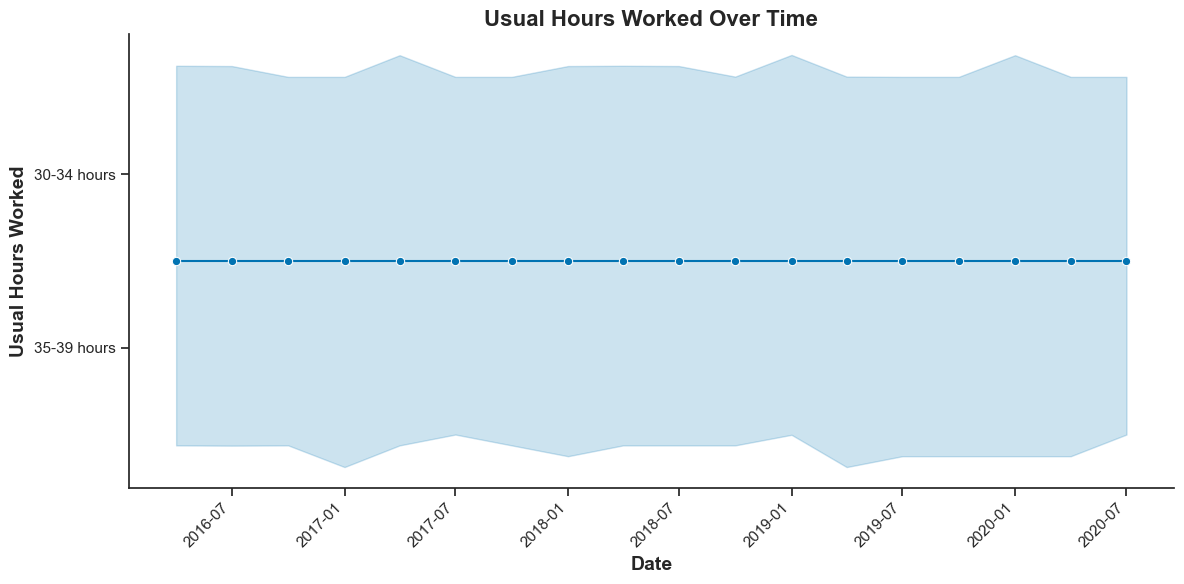

In [20]:
sns.set(style='ticks', palette='colorblind')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hours, x='Quarter(hours)', y='Usual Hours Worked', color='b', marker='o')

# Add labels to graph
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Usual Hours Worked', fontsize=14, fontweight='bold')
plt.title('Usual Hours Worked Over Time', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()

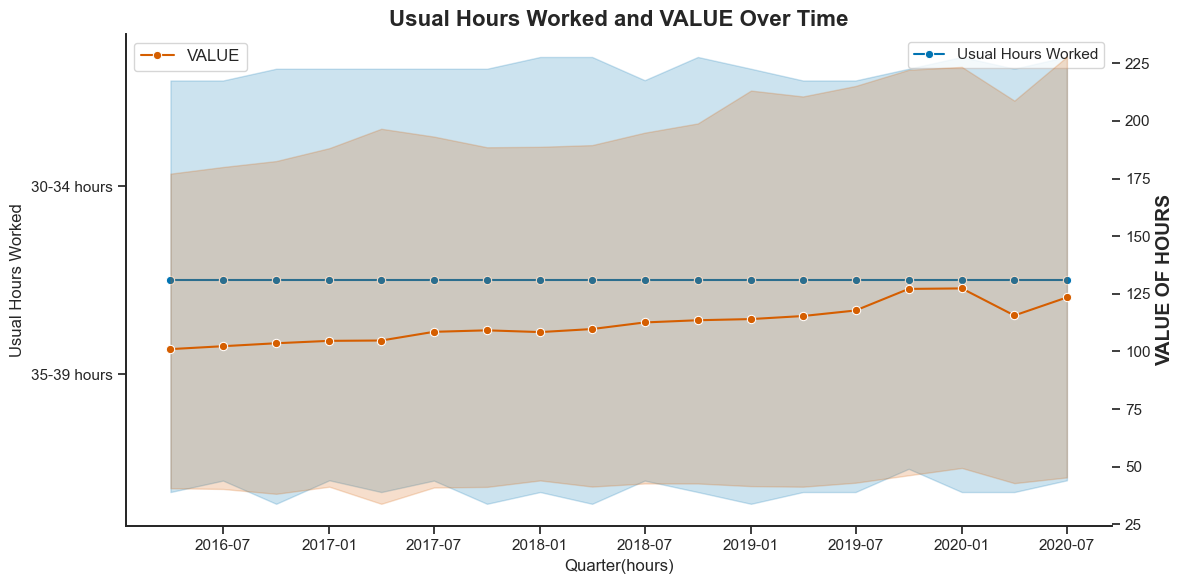

In [21]:
sns.set(style='ticks', palette='colorblind')

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot Usual Hours Worked
sns.lineplot(data=df_hours, x='Quarter(hours)', y='Usual Hours Worked', color='b', marker='o', label='Usual Hours Worked')

# Plot VALUE on secondary y-axis
ax = plt.gca().twinx()
sns.lineplot(data=df_hours, x='Quarter(hours)', y='VALUE', color='r', marker='o', label='VALUE', ax=ax)

# Add labels to your graph
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Usual Hours Worked', fontsize=14, fontweight='bold')
ax.set_ylabel('VALUE OF HOURS', fontsize=14, fontweight='bold')
plt.title('Usual Hours Worked and VALUE Over Time', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the right and top spines for cleaner appearance
sns.despine()

# Add legend
plt.legend(loc='upper left', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [22]:
df_h['Year(hours)'] = df_h['Quarter(hours)'].dt.year
df_h['Month(hours)'] = df_h['Quarter(hours)'].dt.month
df_h

,Statistic Label,NMW earnings status,Usual Hours Worked,Quarter,UNIT,VALUE(hours),Quarter(hours),Year(hours),Month(hours)
0,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q2,Thousand,16.6,2016-04-01,2016,4
1,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q3,Thousand,12.2,2016-07-01,2016,7
2,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q4,Thousand,15.3,2016-10-01,2016,10
3,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q1,Thousand,13.7,2017-01-01,2017,1
4,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q2,Thousand,13.3,2017-04-01,2017,4
...,...,...,...,...,...,...,...,...,...
117,Employees aged 15 years and over,Employees reporting earning National Minimum W...,45 hours and over,2018Q3,Thousand,7.1,2018-07-01,2018,7
118,Employees aged 15 years and over,Employees reporting earning National Minimum W...,45 hours and over,2018Q4,Thousand,4.9,2018-10-01,2018,10
119,Employees aged 15 years and over,Employees reporting earning National Minimum W...,45 hours and over,2019Q1,Thousand,7.4,2019-01-01,2019,1
120,Employees aged 15 years and over,Employees reporting earning National Minimum W...,45 hours and over,2019Q2,Thousand,6.0,2019-04-01,2019,4


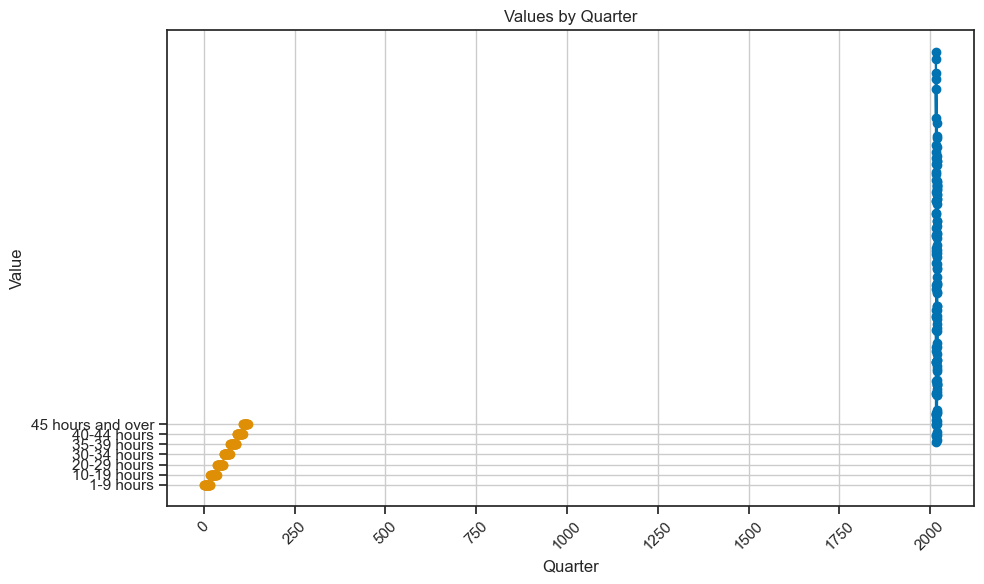

In [23]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
# Example: data = [(16.6, '1-9 hours', '2016Q2'), (12.2, '1-9 hours', '2016Q3'), ...]
categories=df_h["Usual Hours Worked"] 

x_values = df_h["Year(hours)"]
y_values = df_h["VALUE(hours)"]
z_values = df_h["Usual Hours Worked"] # Values

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(x_values, y_values, z_values, marker='o')  # 'o' adds markers to data points
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Values by Quarter')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)

plt.tight_layout()
plt.show()

By the statistical information, the minimum wage workers’ the average weekly working hours are increasing by time as the proposed hypotheses which is mean shows positive relationship with the national minimum wage increase.

### **2.2. Nationality**

In [24]:
# Convert to datetime objects
year_quarter_dates = [pd.Period(quarter, freq='Q') for quarter in df_nat['Quarter']]
dates = [qd.to_timestamp() for qd in year_quarter_dates]

df_nat["Quarter(hours)"]=dates
# Print the converted dates
print(df_nat["Quarter(hours)"])

0     2016-04-01
1     2016-07-01
2     2016-10-01
3     2017-01-01
4     2017-04-01
         ...    
415   2018-10-01
416   2019-01-01
417   2019-04-01
418   2019-07-01
419   2019-10-01
Name: Quarter(hours), Length: 420, dtype: datetime64[ns]


In [25]:
df_nat['Year(nationality)'] = df_nat['Quarter(hours)'].dt.year
df_nat['Month(nationality)'] = df_nat['Quarter(hours)'].dt.month
df_nat

,Statistic Label,Nationality,NMW earnings status,Quarter,UNIT,VALUE,Quarter(hours),Year(nationality),Month(nationality)
0,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4,2016-04-01,2016,4
1,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1,2016-07-01,2016,7
2,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3,2016-10-01,2016,10
3,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3,2017-01-01,2017,1
4,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7,2017-04-01,2017,4
...,...,...,...,...,...,...,...,...,...
415,Employees aged 15 years and over,Other nationals,Total employees,2018Q4,Thousand,118.0,2018-10-01,2018,10
416,Employees aged 15 years and over,Other nationals,Total employees,2019Q1,Thousand,121.2,2019-01-01,2019,1
417,Employees aged 15 years and over,Other nationals,Total employees,2019Q2,Thousand,129.7,2019-04-01,2019,4
418,Employees aged 15 years and over,Other nationals,Total employees,2019Q3,Thousand,132.8,2019-07-01,2019,7


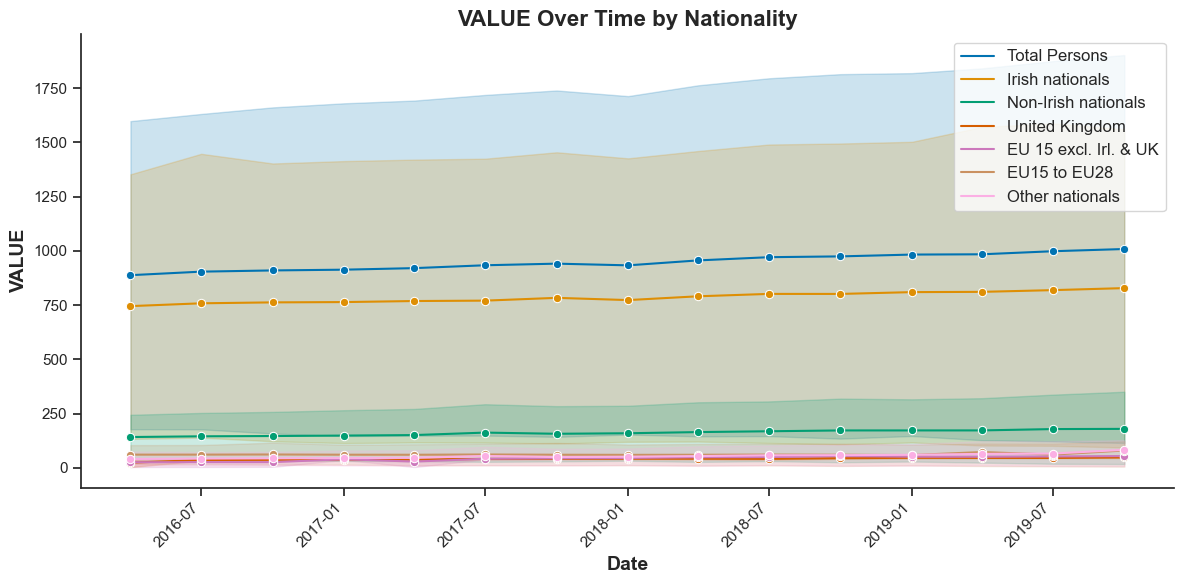

In [26]:
# Setting style for the plot
sns.set(style='ticks', palette='colorblind')

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot VALUE for each nationality
sns.lineplot(data=df_nat, x='Quarter(hours)', y='VALUE', hue='Nationality', marker='o')

# Add labels to your graph
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('VALUE', fontsize=14, fontweight='bold')
plt.title('VALUE Over Time by Nationality', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the right and top spines for cleaner appearance
sns.despine()

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [27]:
df_nat.head()

,Statistic Label,Nationality,NMW earnings status,Quarter,UNIT,VALUE,Quarter(hours),Year(nationality),Month(nationality)
0,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4,2016-04-01,2016,4
1,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1,2016-07-01,2016,7
2,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3,2016-10-01,2016,10
3,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3,2017-01-01,2017,1
4,Employees aged 15 years and over,Total Persons,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7,2017-04-01,2017,4


In [28]:
# Drop rows where "NMW earnings status" is "Total employees", "Employees reporting earning more than National Minimum Wage"
df_nation = df_nat.drop(df_nat[(df_nat["NMW earnings status"] == "Total employees") 
                           | (df_nat["Nationality"] == "Total Persons")    
                           | (df_nat["NMW earnings status"] == "Employees reporting earning more than National Minimum Wage")].index)

In [29]:
# to change the name of the 'VALUE' column
df_nation.rename(columns={'VALUE': 'VALUE(nationality)'}, inplace=True)

In [30]:
# Check for missing values in the DataFrame
missing_values = df_nation.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Statistic Label         0
Nationality             0
NMW earnings status     0
Quarter                 0
UNIT                    0
VALUE(nationality)     58
Quarter(hours)          0
Year(nationality)       0
Month(nationality)      0
dtype: int64


In [31]:
# Drop rows with missing values
df_nation = df_nation.dropna()
# Check the DataFrame after dropping the rows with missing values
df_nation

,Statistic Label,Nationality,NMW earnings status,Quarter,UNIT,VALUE(nationality),Quarter(hours),Year(nationality),Month(nationality)
60,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q2,Thousand,147.3,2016-04-01,2016,4
61,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q3,Thousand,141.6,2016-07-01,2016,7
62,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q4,Thousand,116.7,2016-10-01,2016,10
63,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q1,Thousand,103.3,2017-01-01,2017,1
64,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q2,Thousand,100.4,2017-04-01,2017,4
...,...,...,...,...,...,...,...,...,...
399,Employees aged 15 years and over,Other nationals,Not stated,2018Q3,Thousand,9.6,2018-07-01,2018,7
400,Employees aged 15 years and over,Other nationals,Not stated,2018Q4,Thousand,6.6,2018-10-01,2018,10
401,Employees aged 15 years and over,Other nationals,Not stated,2019Q1,Thousand,12.4,2019-01-01,2019,1
402,Employees aged 15 years and over,Other nationals,Not stated,2019Q2,Thousand,9.7,2019-04-01,2019,4


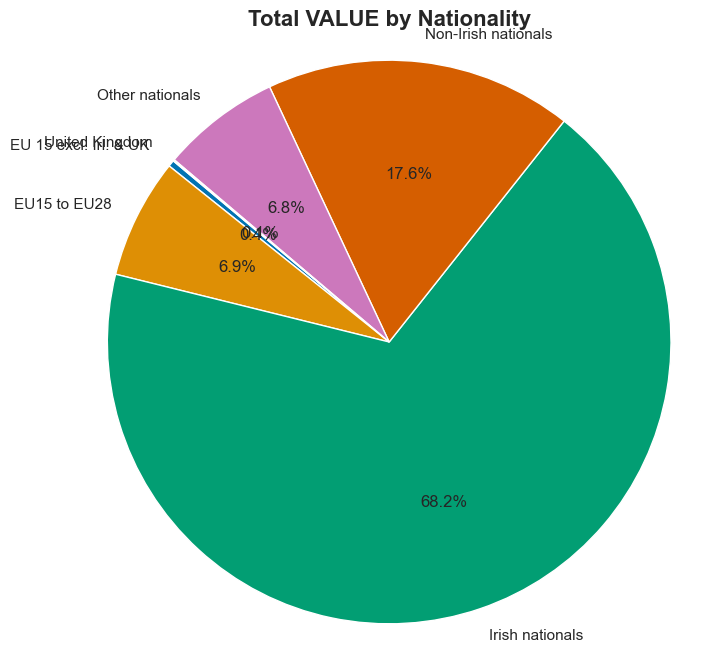

In [32]:
# Group the data by nationality and calculate the total VALUE for each group
nationality_value = df_nation.groupby('Nationality')['VALUE(nationality)'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(nationality_value['VALUE(nationality)'], labels=nationality_value['Nationality'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Total VALUE by Nationality', fontsize=16, fontweight='bold')

# Display the pie chart
plt.show()

### Need to make with time series

In [33]:
replacement_dict_sector = {
    'Irish nationals': 0,
    'Non-Irish nationals': 1,
    'United Kingdom': 2,
    'EU 15 excl. Irl. & UK': 3,
    'EU15 to EU28': 4,
    'Other nationals': 5
}

df_nation['Nationality'] = df_nation['Nationality'].replace(replacement_dict_sector)
df_nation.head()

,Statistic Label,Nationality,NMW earnings status,Quarter,UNIT,VALUE(nationality),Quarter(hours),Year(nationality),Month(nationality)
60,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q2,Thousand,147.3,2016-04-01,2016,4
61,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q3,Thousand,141.6,2016-07-01,2016,7
62,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q4,Thousand,116.7,2016-10-01,2016,10
63,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2017Q1,Thousand,103.3,2017-01-01,2017,1
64,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2017Q2,Thousand,100.4,2017-04-01,2017,4


### **2.3. Economic sector**

In [34]:
df_sector

,Statistic Label,NACE Rev 2 Economic Sector,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
1291,Employees aged 15 years and over,Not stated,Total employees,2019Q3,Thousand,5.3
1292,Employees aged 15 years and over,Not stated,Total employees,2019Q4,Thousand,5.9
1293,Employees aged 15 years and over,Not stated,Total employees,2020Q1,Thousand,NaN
1294,Employees aged 15 years and over,Not stated,Total employees,2020Q2,Thousand,NaN


In [35]:
# drop all "Not stated" values and "All NACE economic secpors" from "NACE Rev 2 Economic Sector"
df_sec=df_sector.drop(df_sector[(df_sector["NACE Rev 2 Economic Sector"] == "Not stated")
                               |(df_sector["NACE Rev 2 Economic Sector"] == "All NACE economic sectors")].index)

# Drop rows where "NMW earnings status" is "Total employees", "Employees reporting earning more than National Minimum Wage" or "Not Stated"
df_se = df_sec.drop(df_sec[(df_sec["NMW earnings status"] == "Total employees") 
                           | (df_sec["NMW earnings status"] == "Employees reporting earning more than National Minimum Wage") 
                           | (df_sec["NMW earnings status"] == "Not stated")].index)

In [36]:
# Check for missing values in the DataFrame
missing_values = df_se.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Statistic Label                 0
NACE Rev 2 Economic Sector      0
NMW earnings status             0
Quarter                         0
UNIT                            0
VALUE                         105
dtype: int64


In [37]:
# Drop rows with missing values
df_sec = df_se.dropna()
m_values = df_sec.isnull().sum()
# Check the DataFrame after dropping the rows with missing values
print(m_values)

Statistic Label               0
NACE Rev 2 Economic Sector    0
NMW earnings status           0
Quarter                       0
UNIT                          0
VALUE                         0
dtype: int64


In [38]:
# Convert to datetime objects
year_quarter_dates = [pd.Period(quarter, freq='Q') for quarter in df_se['Quarter']]
dates = [qd.to_timestamp() for qd in year_quarter_dates]

df_se["Quarter(hours)"]=dates

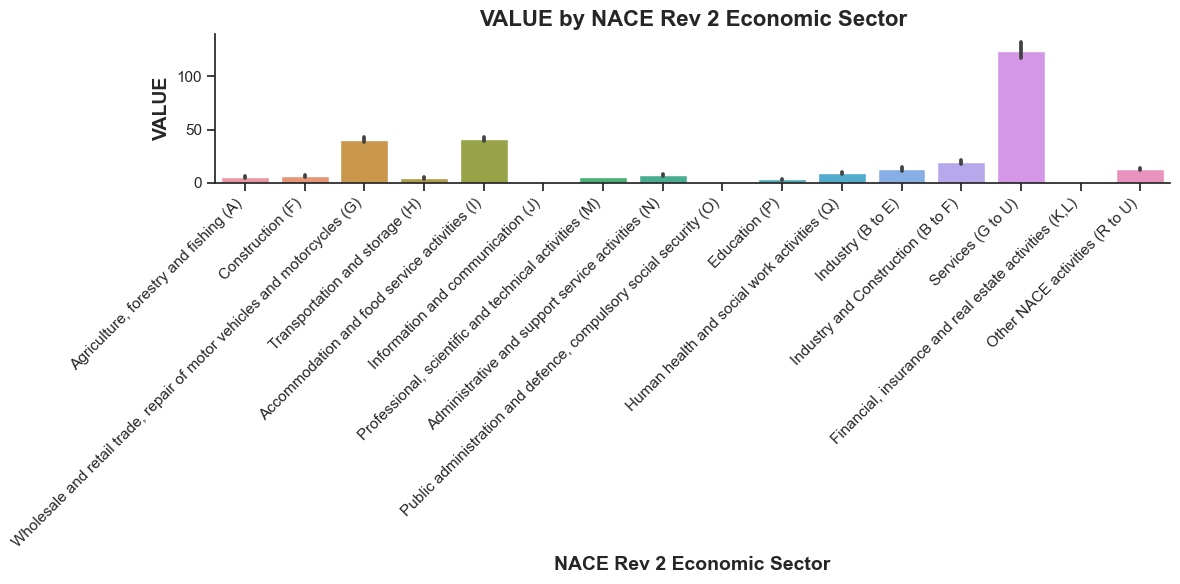

In [39]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_se, x='NACE Rev 2 Economic Sector', y='VALUE')

# Add labels to your graph
plt.xlabel('NACE Rev 2 Economic Sector', fontsize=14, fontweight='bold')
plt.ylabel('VALUE', fontsize=14, fontweight='bold')
plt.title('VALUE by NACE Rev 2 Economic Sector', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the right and top spines for cleaner appearance
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()

### Need to make with time series

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

In [40]:
replacement_dict_sector = {
    'Agriculture, forestry and fishing (A)': 0,
    'Construction (F)': 1,
    'Wholesale and retail trade, repair of motor vehicles and motorcycles (G)': 2,
    'Transportation and storage (H)': 3,
    'Accommodation and food service activities (I)': 4,
    'Information and communication (J)':5,
    'Professional, scientific and technical activities (M)': 6,
    'Administrative and support service activities (N)': 7,
    'Public administration and defence, compulsory social security (O)':8,
    'Education (P)': 9,
    'Human health and social work activities (Q)': 10,
    'Industry (B to E)': 11,
    'Industry and Construction (B to F)': 12,
    'Services (G to U)': 13,
    'Financial, insurance and real estate activities (K,L)':14,
    'Other NACE activities (R to U)': 15
}

df_se['NACE Rev 2 Economic Sector'] = df_se['NACE Rev 2 Economic Sector'].replace(replacement_dict_sector)

In [41]:
# Assuming you have a DataFrame named 'df' and you want to get the unique values in a column named 'column_name'
unique_values = df_se['NACE Rev 2 Economic Sector'].unique()

# Print the unique values
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [42]:
df_se['Year(sector)'] = df_se['Quarter(hours)'].dt.year
df_se['Month(sector)'] = df_se['Quarter(hours)'].dt.month
df_se

,Statistic Label,NACE Rev 2 Economic Sector,NMW earnings status,Quarter,UNIT,VALUE,Quarter(hours),Year(sector),Month(sector)
72,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q2,Thousand,8.1,2016-04-01,2016,4
73,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q3,Thousand,6.4,2016-07-01,2016,7
74,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q4,Thousand,3.9,2016-10-01,2016,10
75,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2017Q1,Thousand,5.5,2017-01-01,2017,1
76,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2017Q2,Thousand,NaN,2017-04-01,2017,4
...,...,...,...,...,...,...,...,...,...
1165,Employees aged 15 years and over,15,Employees reporting earning National Minimum W...,2019Q3,Thousand,11.4,2019-07-01,2019,7
1166,Employees aged 15 years and over,15,Employees reporting earning National Minimum W...,2019Q4,Thousand,10.6,2019-10-01,2019,10
1167,Employees aged 15 years and over,15,Employees reporting earning National Minimum W...,2020Q1,Thousand,8.9,2020-01-01,2020,1
1168,Employees aged 15 years and over,15,Employees reporting earning National Minimum W...,2020Q2,Thousand,11.0,2020-04-01,2020,4


In [43]:
# to change the name of the 'VALUE' column
df_se.rename(columns={'VALUE': 'VALUE(sector)'}, inplace=True)

In [44]:
# Assuming your DataFrame is named 'df'
df_sec = df_se[df_se['VALUE(sector)'] >= 8.0]
df_sec

,Statistic Label,NACE Rev 2 Economic Sector,NMW earnings status,Quarter,UNIT,VALUE(sector),Quarter(hours),Year(sector),Month(sector)
72,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q2,Thousand,8.1,2016-04-01,2016,4
144,Employees aged 15 years and over,1,Employees reporting earning National Minimum W...,2016Q2,Thousand,8.1,2016-04-01,2016,4
216,Employees aged 15 years and over,2,Employees reporting earning National Minimum W...,2016Q2,Thousand,52.6,2016-04-01,2016,4
217,Employees aged 15 years and over,2,Employees reporting earning National Minimum W...,2016Q3,Thousand,47.0,2016-07-01,2016,7
218,Employees aged 15 years and over,2,Employees reporting earning National Minimum W...,2016Q4,Thousand,42.7,2016-10-01,2016,10
...,...,...,...,...,...,...,...,...,...
1165,Employees aged 15 years and over,15,Employees reporting earning National Minimum W...,2019Q3,Thousand,11.4,2019-07-01,2019,7
1166,Employees aged 15 years and over,15,Employees reporting earning National Minimum W...,2019Q4,Thousand,10.6,2019-10-01,2019,10
1167,Employees aged 15 years and over,15,Employees reporting earning National Minimum W...,2020Q1,Thousand,8.9,2020-01-01,2020,1
1168,Employees aged 15 years and over,15,Employees reporting earning National Minimum W...,2020Q2,Thousand,11.0,2020-04-01,2020,4


### **2.4. Education level**

In [45]:
df_education

,Statistic Label,Education Level,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
571,Employees aged 15 years and over,Other/not stated,Total employees,2019Q3,Thousand,58.3
572,Employees aged 15 years and over,Other/not stated,Total employees,2019Q4,Thousand,56.5
573,Employees aged 15 years and over,Other/not stated,Total employees,2020Q1,Thousand,57.0
574,Employees aged 15 years and over,Other/not stated,Total employees,2020Q2,Thousand,38.5


In [46]:
# Drop rows where "NMW earnings status" is "Total employees", "Employees reporting earning more than National Minimum Wage" or "Not Stated"
df_edu = df_education.drop(df_education[(df_education["Education Level"] == "All levels of education") 
                           | (df_education["Education Level"] == "Other/not stated") 
                           | (df_education["NMW earnings status"] == "Employees reporting earning more than National Minimum Wage") 
                           | (df_education["NMW earnings status"] == "Total employees") 
                           | (df_education["NMW earnings status"] == "Not stated")].index)

In [47]:
# Convert to datetime objects
year_quarter_dates = [pd.Period(quarter, freq='Q') for quarter in df_edu['Quarter']]
dates = [qd.to_timestamp() for qd in year_quarter_dates]
df_edu["Quarter(hours)"]=dates

In [48]:
# Check for missing values in the DataFrame
missing_values = df_edu.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Statistic Label        0
Education Level        0
NMW earnings status    0
Quarter                0
UNIT                   0
VALUE                  0
Quarter(hours)         0
dtype: int64


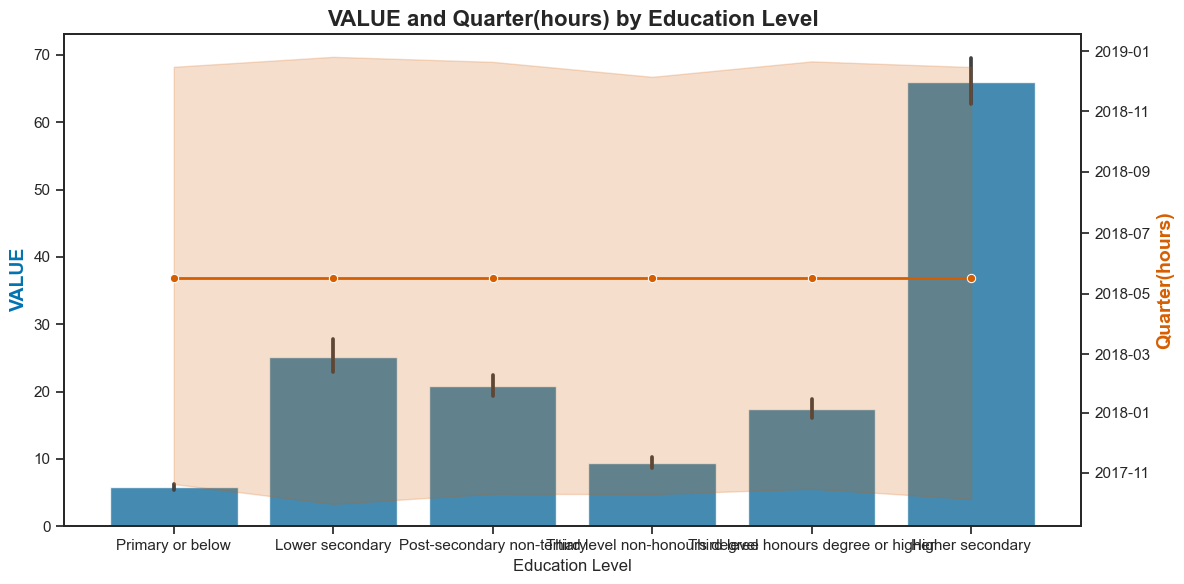

In [49]:
# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot VALUE on the first y-axis (left y-axis)
sns.barplot(data=df_edu, x='Education Level', y='VALUE', ax=ax1, color='b', alpha=0.8)

# Set the label for the first y-axis
ax1.set_ylabel('VALUE', fontsize=14, fontweight='bold', color='b')

# Create the second y-axis (right y-axis) for Quarter(hours)
ax2 = ax1.twinx()

# Plot Quarter(hours) on the second y-axis (right y-axis)
sns.lineplot(data=df_edu, x='Education Level', y='Quarter(hours)', ax=ax2, color='r', marker='o', linewidth=2)

# Set the label for the second y-axis
ax2.set_ylabel('Quarter(hours)', fontsize=14, fontweight='bold', color='r')

# Add labels to your graph
plt.xlabel('Education Level', fontsize=14, fontweight='bold')
plt.title('VALUE and Quarter(hours) by Education Level', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


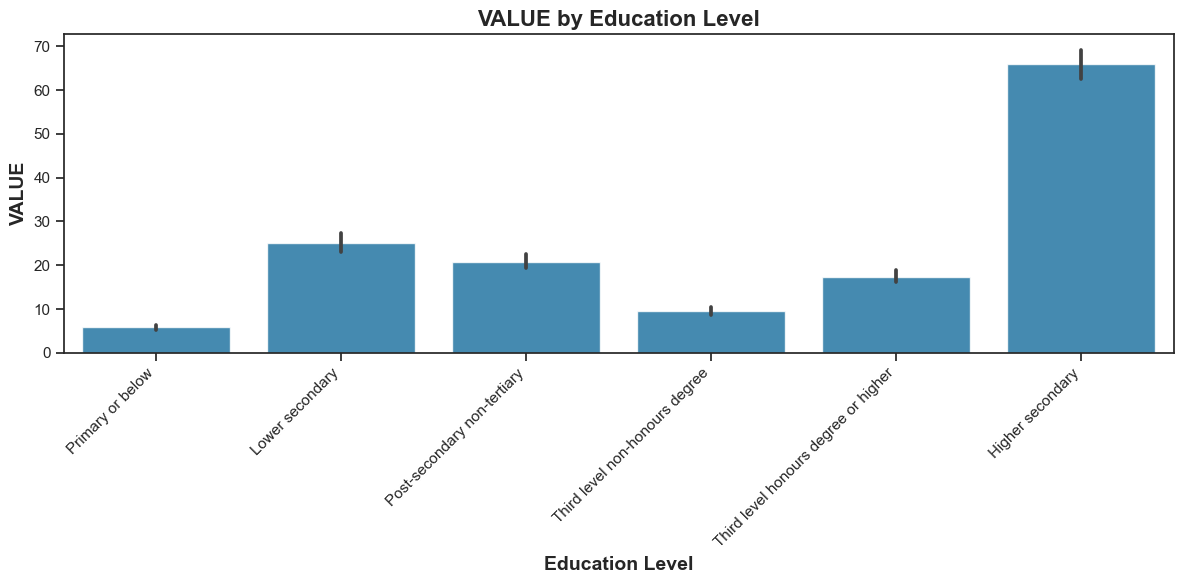

In [50]:
# Create the bar plot for VALUE
plt.figure(figsize=(12, 6))
sns.barplot(data=df_edu, x='Education Level', y='VALUE', color='b', alpha=0.8)

# Add labels to your graph
plt.xlabel('Education Level', fontsize=14, fontweight='bold')
plt.ylabel('VALUE', fontsize=14, fontweight='bold')
plt.title('VALUE by Education Level', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Need to make with time series


In [51]:
replacement_dict_edu = {
    'Primary or below': 0,
    'Lower secondary': 1,
    'Post-secondary non-tertiary': 2,
    'Third level non-honours degree': 3,
    'Third level honours degree or higher':4,
    'Higher secondary': 5,
}

df_edu['Education Level'] = df_edu['Education Level'].replace(replacement_dict_edu)

In [52]:
# to change the name of the 'VALUE' column
df_edu.rename(columns={'VALUE': 'VALUE(education)'}, inplace=True)

In [53]:
df_edu['Year(education)'] = df_edu['Quarter(hours)'].dt.year
df_edu['Month(education)'] = df_edu['Quarter(hours)'].dt.month
df_edu.head()

,Statistic Label,Education Level,NMW earnings status,Quarter,UNIT,VALUE(education),Quarter(hours),Year(education),Month(education)
72,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q2,Thousand,8.1,2016-04-01,2016,4
73,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q3,Thousand,6.5,2016-07-01,2016,7
74,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2016Q4,Thousand,7.2,2016-10-01,2016,10
75,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2017Q1,Thousand,5.8,2017-01-01,2017,1
76,Employees aged 15 years and over,0,Employees reporting earning National Minimum W...,2017Q2,Thousand,4.8,2017-04-01,2017,4


In [54]:
df_edu.dtypes

Statistic Label                object
Education Level                 int64
NMW earnings status            object
Quarter                        object
UNIT                           object
VALUE(education)              float64
Quarter(hours)         datetime64[ns]
Year(education)                 int64
Month(education)                int64
dtype: object

# 3. Applying Machine Learning Models

X was created by selected valuable variables from four different datasets for use in machine learning methods

In [55]:
# Collecting X and Y values
vars_df1 = df_h[['VALUE(hours)', 'Year(hours)', "Month(hours)"]] 
vars_df2 = df_nation[['VALUE(nationality)', 'Nationality', 'Year(nationality)', "Month(nationality)"]] 
vars_df3 = df_sec[['VALUE(sector)', 'NACE Rev 2 Economic Sector', 'Year(sector)', "Month(sector)"]] 
vars_df4 = df_edu[['VALUE(education)', 'Education Level', 'Year(education)', "Month(education)"]]  
 

# Concatenate the selected variables horizontally to create x_train
X= pd.concat([vars_df1, vars_df2, vars_df3, vars_df4], axis=1)
y=df_h["Usual Hours Worked"].values

In [56]:
X

,VALUE(hours),Year(hours),Month(hours),VALUE(nationality),Nationality,Year(nationality),Month(nationality),VALUE(sector),NACE Rev 2 Economic Sector,Year(sector),Month(sector),VALUE(education),Education Level,Year(education),Month(education)
0,16.6,2016.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.2,2016.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15.3,2016.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.7,2017.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.3,2017.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.3,5.0,2019.0,7.0
446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.5,5.0,2019.0,10.0
447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,5.0,2020.0,1.0
448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.3,5.0,2020.0,4.0


In [57]:
# Reset the indices of selected variable DataFrames
vars_df1_reset = vars_df1.reset_index(drop=True)
vars_df2_reset = vars_df2.reset_index(drop=True)
vars_df3_reset = vars_df3.reset_index(drop=True)
vars_df4_reset = vars_df4.reset_index(drop=True)

# Concatenate the selected variables horizontally to create x
X = pd.concat([vars_df1_reset, vars_df2_reset, vars_df3_reset, vars_df4_reset], axis=1)

In [58]:
X.to_csv('out.csv', index=False)

In [59]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (129, 15)
y shape: (122,)


### Splitting the dataset into the Training set and Test set


In [60]:
# Check for missing values in X 
mis_values = X.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Statistic Label        0
Education Level        0
NMW earnings status    0
Quarter                0
UNIT                   0
VALUE                  0
Quarter(hours)         0
dtype: int64


In [61]:
# Drop the last 14 rows from the DataFrame 'df'
X = X.iloc[:-21]
y = y[:-14]

In [62]:
print(mis_values)

VALUE(hours)                   7
Year(hours)                    7
Month(hours)                   7
VALUE(nationality)             7
Nationality                    7
Year(nationality)              7
Month(nationality)             7
VALUE(sector)                  0
NACE Rev 2 Economic Sector     0
Year(sector)                   0
Month(sector)                  0
VALUE(education)              21
Education Level               21
Year(education)               21
Month(education)              21
dtype: int64


#### Cross-Validation

In [63]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create instances of the models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
}

# Perform cross-validation and compare models
num_folds = 5  # Number of cross-validation folds

mean_scores = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=num_folds, scoring='accuracy')
    mean_score = np.mean(scores)
    mean_scores[model_name] = mean_score

# Print the mean accuracy scores for each model
for model_name, mean_score in mean_scores.items():
    print(f"Mean Accuracy for {model_name}: {mean_score}")

# Choose the model with the highest mean accuracy score
chosen_model_name = max(mean_scores, key=mean_scores.get)
chosen_model = models[chosen_model_name]

print(f"Selected Model: {chosen_model_name}")

# Train the chosen model on the full dataset
chosen_model.fit(X, y)

Mean Accuracy for Logistic Regression: 0.9073593073593074
Mean Accuracy for Random Forest: 0.9168831168831169
Mean Accuracy for Decision Tree: 0.9181818181818182
Mean Accuracy for Naive Bayes: 0.9454545454545455
Mean Accuracy for SVM: 0.32597402597402597
Selected Model: Naive Bayes


GaussianNB()

Based on the mean accuracy scores from cross-validation, the Random Forest classifier has the highest accuracy, making it the selected model for my dataset. The selected model achieved a mean accuracy of approximately 94.55%.

## 4.1. Random Forest


In [64]:
# Load the library 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((108, 15), (108,), (81, 15), (27, 15), (81,), (27,))

In [65]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#Create three RandomForestClassifier models
clf = RandomForestClassifier(n_estimators = 100)
model2=RandomForestClassifier(n_estimators = 150)
model3=RandomForestClassifier(n_estimators = 50)
#Train the model using the training sets 
clf.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
# Make predictions with the individual models
y1_pred = clf.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
# Calculate accuracy for each model and the ensemble
accuracy1 = accuracy_score(y_test, y1_pred)
accuracy2 = accuracy_score(y_test, pred2)
accuracy3 = accuracy_score(y_test, pred3)
# Display the accuracy for each model and the ensemble
print("Accuracy for Model 1:", accuracy1)
print("Accuracy for Model 2:", accuracy2)
print("Accuracy for Model 3:", accuracy3)

Accuracy for Model 1: 0.8888888888888888
Accuracy for Model 2: 0.8888888888888888
Accuracy for Model 3: 0.8888888888888888


In [66]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics    
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y1_pred))

Accuracy: 0.8888888888888888


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

              precision    recall  f1-score   support

   1-9 hours       1.00      1.00      1.00         5
 10-19 hours       0.60      1.00      0.75         3
 20-29 hours       0.83      0.71      0.77         7
 30-34 hours       1.00      0.75      0.86         4
 35-39 hours       1.00      1.00      1.00         5
 40-44 hours       1.00      1.00      1.00         3

    accuracy                           0.89        27
   macro avg       0.91      0.91      0.90        27
weighted avg       0.91      0.89      0.89        27



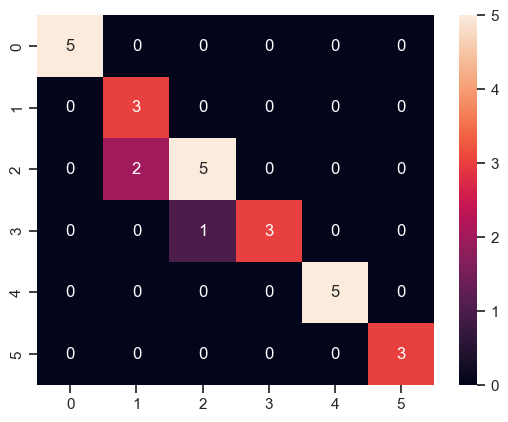

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate cm by calling a method named as 'confusion_matrix'
cm2 = confusion_matrix(y_test, y1_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm2, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y1_pred))

The overall accuracy of the model is 0.92, which means it correctly classifies 93% of the instances in the dataset. The macro average and weighted average F1-scores are both 0.93, indicating good overall model performance.

In [68]:
# Use of Cross-Validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, scoring='accuracy').mean()

0.9359307359307361

In [69]:
pd.crosstab(y_test, y1_pred, rownames=["Actual hours"], colnames=["Predicted hours"])

Predicted hours,1-9 hours,10-19 hours,20-29 hours,30-34 hours,35-39 hours,40-44 hours
Actual hours,,,,,,
1-9 hours,5,0,0,0,0,0
10-19 hours,0,3,0,0,0,0
20-29 hours,0,2,5,0,0,0
30-34 hours,0,0,1,3,0,0
35-39 hours,0,0,0,0,5,0
40-44 hours,0,0,0,0,0,3


### Finding Important Features in Scikit-learn


In [70]:
feature_imp = pd.Series(clf.feature_importances_, index=['VALUE(hours)', 'Year(hours)', "Month(hours)",
                       'VALUE(nationality)', 'Nationality', 'Year(nationality)', "Month(nationality)",                                 
                       'VALUE(sector)', 'NACE Rev 2 Economic Sector', 'Year(sector)', "Month(sector)",
                       'VALUE(education)', 'Education Level', 'Year(education)', "Month(education)"                                
                        ]).sort_values(ascending=False)
feature_imp

Education Level               0.231286
VALUE(education)              0.164616
NACE Rev 2 Economic Sector    0.129423
VALUE(hours)                  0.118944
VALUE(nationality)            0.117775
Nationality                   0.103103
VALUE(sector)                 0.074766
Year(sector)                  0.010993
Month(nationality)            0.009908
Year(nationality)             0.009391
Year(hours)                   0.008806
Year(education)               0.007725
Month(education)              0.004744
Month(hours)                  0.004551
Month(sector)                 0.003971
dtype: float64

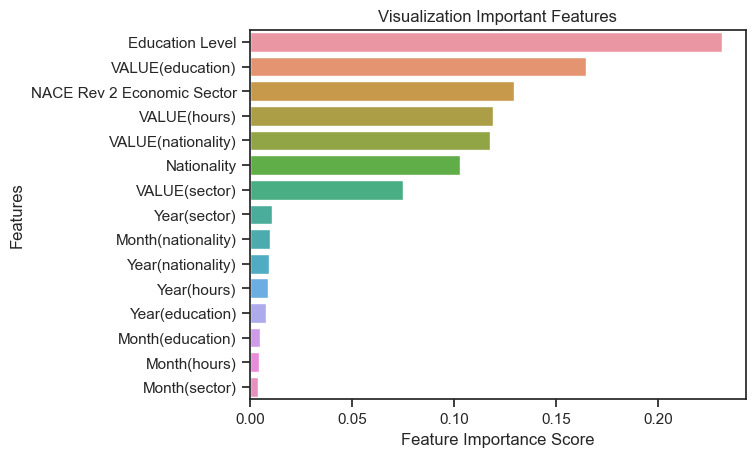

In [71]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualization Important Features")
#plt.legend()
plt.show()

## 3.2. Decision Trees 

In [72]:
# K-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Number of folds
k = 5
# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=k)
# Initialize a classifier (e.g., Decision Tree)
clf = DecisionTreeClassifier()
# Lists to store F1 scores for each fold
f1_scores = []
# Perform stratified k-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate F1 score and store it
    f1 = f1_score(y_test, y_pred, average='macro')  # Use 'macro' for multiclass
    f1_scores.append(f1)
    
# Calculate the average F1 score
average_f1 = sum(f1_scores) / k
print("Average F1 Score:", average_f1)

Average F1 Score: 0.9349999999999999


Calculated the average F1 score for my multiclass classification problem. An F1 score of 0.968 is quite high, indicating that my model is performing well in terms of precision and recall for the classes in the dataset. 

### Training the Decision Tree Classification model on the Training set

In [73]:
print("X data types:", X.dtypes)
print("y data type:", y.dtype)

X data types: VALUE(hours)                  float64
Year(hours)                   float64
Month(hours)                  float64
VALUE(nationality)            float64
Nationality                   float64
Year(nationality)             float64
Month(nationality)            float64
VALUE(sector)                 float64
NACE Rev 2 Economic Sector      int64
Year(sector)                    int64
Month(sector)                   int64
VALUE(education)              float64
Education Level               float64
Year(education)               float64
Month(education)              float64
dtype: object
y data type: object


In [74]:
X.to_csv('output_file.csv', index=False)

In [75]:
# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 4)

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [76]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = classifier.predict(X_test)
y_pred[0:10]

array(['1-9 hours', '1-9 hours', '1-9 hours', '20-29 hours',
       '20-29 hours', '20-29 hours', '20-29 hours', '20-29 hours',
       '20-29 hours', '20-29 hours'], dtype=object)

In [77]:
# Check for overfitting and underfitting¶
print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8095


Here, the training-set accuracy score is 1.0 while the test-set accuracy to be 0.92. These two values are quite comparable. So, there is no sign of overfitting.



### Making the Confusion Matrix

              precision    recall  f1-score   support

   1-9 hours       1.00      1.00      1.00         3
 10-19 hours       0.00      0.00      0.00         4
 20-29 hours       0.43      1.00      0.60         3
 30-34 hours       1.00      1.00      1.00         4
 35-39 hours       1.00      1.00      1.00         4
 40-44 hours       1.00      1.00      1.00         3

    accuracy                           0.81        21
   macro avg       0.74      0.83      0.77        21
weighted avg       0.73      0.81      0.75        21



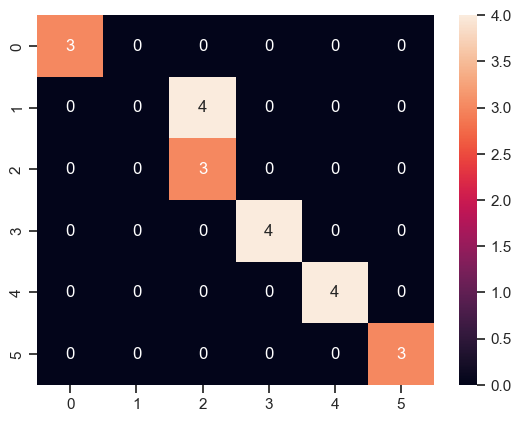

In [78]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [79]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy is:",metrics.accuracy_score(y_test, y_pred))

Accuracy is: 0.8095238095238095


[Text(0.5, 0.9, 'x[12] <= 0.5\ngini = 0.833\nsamples = 87\nvalue = [15, 14, 15, 14, 14, 15]'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 15\nvalue = [15, 0, 0, 0, 0, 0]'),
 Text(0.625, 0.7, 'x[12] <= 4.5\ngini = 0.8\nsamples = 72\nvalue = [0, 14, 15, 14, 14, 15]'),
 Text(0.5, 0.5, 'x[12] <= 2.5\ngini = 0.75\nsamples = 57\nvalue = [0, 14, 15, 14, 14, 0]'),
 Text(0.25, 0.3, 'x[12] <= 1.5\ngini = 0.499\nsamples = 29\nvalue = [0, 14, 15, 0, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [0, 14, 0, 0, 0, 0]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 15, 0, 0, 0]'),
 Text(0.75, 0.3, 'x[0] <= 16.05\ngini = 0.5\nsamples = 28\nvalue = [0, 0, 0, 14, 14, 0]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 0, 14, 0, 0]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 0, 0, 14, 0]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 0, 0, 0, 15]')]

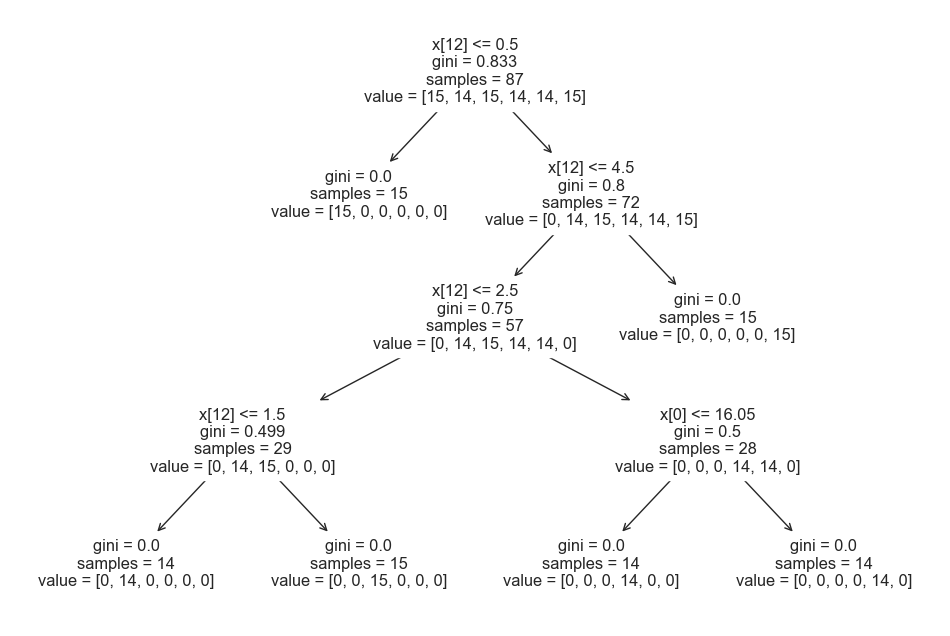

In [80]:
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(classifier.fit(X_train, y_train)) 

### Implementation
So, I have created a model that uses decision tree algorithm to predict the weekly usual working hours of minimum wage workers. The Accuracy of the model is 81.4%. 

### 4.3. Naive Bayes Classification

In [81]:
# Fitting Naive Bayes Classification to the Training set
from sklearn.naive_bayes import GaussianNB

# Create and initialise an object sc by calling a method GaussianNB()
nvclassifier = GaussianNB()

# Train the model by calling a method fit()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [82]:
# Predicting the Test set results
y3_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y3_pred)

['1-9 hours' '1-9 hours' '1-9 hours' '10-19 hours' '10-19 hours'
 '10-19 hours' '10-19 hours' '20-29 hours' '20-29 hours' '20-29 hours'
 '30-34 hours' '30-34 hours' '30-34 hours' '30-34 hours' '35-39 hours'
 '35-39 hours' '35-39 hours' '35-39 hours' '40-44 hours' '40-44 hours'
 '40-44 hours']


In [83]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test, y3_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:10, :]

array([['1-9 hours', '1-9 hours'],
       ['1-9 hours', '1-9 hours'],
       ['1-9 hours', '1-9 hours'],
       ['10-19 hours', '10-19 hours'],
       ['10-19 hours', '10-19 hours'],
       ['10-19 hours', '10-19 hours'],
       ['10-19 hours', '10-19 hours'],
       ['20-29 hours', '20-29 hours'],
       ['20-29 hours', '20-29 hours'],
       ['20-29 hours', '20-29 hours']], dtype=object)

A confusion matrix is a table that is used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

<Axes: >

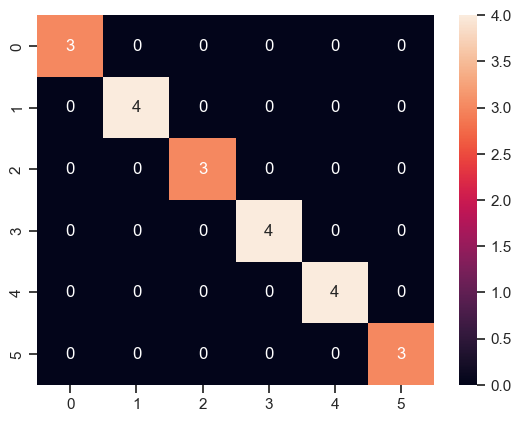

In [84]:
# Construct the Confusion Matrix
cm = confusion_matrix(y_test, y3_pred)
# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

In [85]:
# Find an accuracy from the confusion matrix.
rowsCols = cm.shape
corrPred = 0
falsePred = 0

for row in range(rowsCols[0]):
    for col in range(rowsCols[1]):
        if row == col:
            corrPred += cm[row, col]
        else:
            falsePred += cm[row, col]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))            

Correct predictions:  21
False predictions 0


Accuracy of the Naive Bayes Clasification is:  1.0


In [86]:
# Use of Cross Validation
nvclassifier = GaussianNB()
cross_val_score(nvclassifier, X, y, scoring='accuracy').mean()

0.9454545454545455

### 4.4. Support Vector Machine 

In [87]:
from sklearn.svm import SVC
# Create an object svmModel by calling a method SVC()
svmModel = SVC()

# Train the model by calling a method fit()
svmModel.fit(X_train,y_train)

SVC()

In [88]:
# Predicting the Test set results
y2_pred = svmModel.predict(X_test)

# Display the predicted values
print(y2_pred)

['1-9 hours' '1-9 hours' '1-9 hours' '20-29 hours' '20-29 hours'
 '20-29 hours' '20-29 hours' '20-29 hours' '20-29 hours' '20-29 hours'
 '20-29 hours' '20-29 hours' '20-29 hours' '20-29 hours' '20-29 hours'
 '20-29 hours' '20-29 hours' '20-29 hours' '40-44 hours' '40-44 hours'
 '40-44 hours']


In [89]:
# Check the actual and predicted value side by side
y2_compare = np.vstack((y_test, y2_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y2_compare[:10, :]

array([['1-9 hours', '1-9 hours'],
       ['1-9 hours', '1-9 hours'],
       ['1-9 hours', '1-9 hours'],
       ['10-19 hours', '20-29 hours'],
       ['10-19 hours', '20-29 hours'],
       ['10-19 hours', '20-29 hours'],
       ['10-19 hours', '20-29 hours'],
       ['20-29 hours', '20-29 hours'],
       ['20-29 hours', '20-29 hours'],
       ['20-29 hours', '20-29 hours']], dtype=object)

In [90]:
y2_pred=svmModel.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y2_pred))

Accuracy: 0.42857142857142855


In [91]:
# Use of Cross Validation
cross_val_score(svmModel, X, y, scoring='accuracy').mean()

0.32597402597402597

### 4.5. Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model for multi-class classification
LR = LogisticRegression(multi_class='ovr')

# Fit the model to the training data
LR.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [93]:
# Predict on the test data
y_pred4 = LR.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred4)
report = classification_report(y_test, y_pred4)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9523809523809523
Classification Report:
              precision    recall  f1-score   support

   1-9 hours       1.00      1.00      1.00         3
 10-19 hours       1.00      1.00      1.00         4
 20-29 hours       1.00      0.67      0.80         3
 30-34 hours       0.80      1.00      0.89         4
 35-39 hours       1.00      1.00      1.00         4
 40-44 hours       1.00      1.00      1.00         3

    accuracy                           0.95        21
   macro avg       0.97      0.94      0.95        21
weighted avg       0.96      0.95      0.95        21



#### Feature importance

In [94]:
# Get the coefficients (weights) assigned to each feature
coefficients = LR.coef_[0]

# Create a list of feature names
feature_names = ['VALUE(hours)', 'Year(hours)', "Month(hours)",
                       'VALUE(nationality)', 'Nationality', 'Year(nationality)', "Month(nationality)",                                 
                       'VALUE(sector)', 'NACE Rev 2 Economic Sector', 'Year(sector)', "Month(sector)",
                       'VALUE(education)', 'Education Level', 'Year(education)', "Month(education)"                                
                        ]

# Create a dictionary to store feature importance
feature_importance = dict(zip(feature_names, coefficients))

# Sort the features by their importance (absolute value of coefficients)
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True))

# Print or visualize the feature importance
for feature, importance in sorted_feature_importance.items():
    print(f"Feature: {feature}, Importance: {importance}")

Feature: VALUE(education), Importance: -0.40765412356791186
Feature: VALUE(hours), Importance: -0.3092361299004111
Feature: VALUE(nationality), Importance: 0.13650916724044332
Feature: NACE Rev 2 Economic Sector, Importance: -0.07565836793837366
Feature: VALUE(sector), Importance: 0.05189670605882133
Feature: Month(nationality), Importance: 0.035091497685750886
Feature: Education Level, Importance: -0.03255263748615917
Feature: Month(hours), Importance: 0.021766708035679413
Feature: Month(education), Importance: 0.021766708035679413
Feature: Year(nationality), Importance: -0.012767628213378185
Feature: Month(sector), Importance: 0.01238787343469019
Feature: Nationality, Importance: -0.008337882856065388
Feature: Year(hours), Importance: 0.00506174689733788
Feature: Year(education), Importance: 0.00506174689733788
Feature: Year(sector), Importance: 0.00041331754309347976


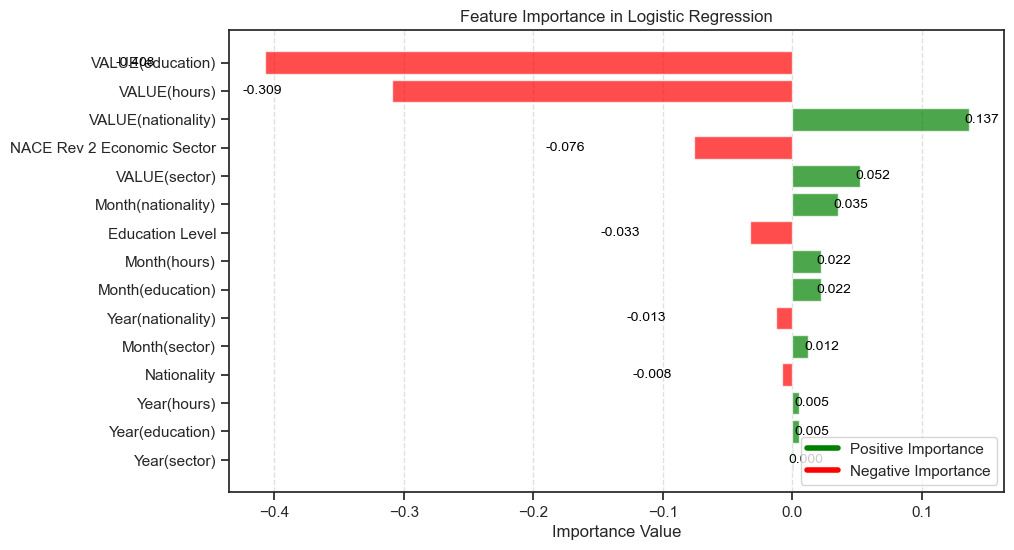

In [95]:
# Sort the features by their importance (absolute value of coefficients)
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True))

# Create lists for feature names and their corresponding importance values
sorted_feature_names = list(sorted_feature_importance.keys())
sorted_importance_values = list(sorted_feature_importance.values())

# Create a color map for the bars based on importance values
colors = ['green' if val > 0 else 'red' for val in sorted_importance_values]

# Create a horizontal bar chart with customized colors and styles
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_feature_names, sorted_importance_values, color=colors, alpha=0.7)

# Add labels to the bars to display the importance values
for bar, importance in zip(bars, sorted_importance_values):
    plt.text(bar.get_width() + 0.01 if importance > 0 else bar.get_width() - 0.1, bar.get_y() + bar.get_height()/2, f'{importance:.3f}', ha='center', va='center', fontsize=10, color='black')

plt.xlabel('Importance Value')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()

# Customize the grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add a color legend for positive and negative importance values
plt.legend(handles=[plt.Line2D([0], [0], color='green', lw=4, label='Positive Importance'),
                    plt.Line2D([0], [0], color='red', lw=4, label='Negative Importance')],
           loc='lower right')

plt.show()

### 4.6. Artificial neural networks

In [96]:
# Replacing index string to integer for train machine learing models
replacement_dict = {
    '1-9 hours': 0,
    '10-19 hours': 0,
    '20-29 hours': 1,
    '30-34 hours': 1,
    '35-39 hours': 1,
    '40-44 hours': 1,
    '45 hours and over': 1
}

df_h['Usual Hours Worked'] = df_h['Usual Hours Worked'].replace(replacement_dict)

In [97]:
y1=df_h["Usual Hours Worked"].values
y1 = y1[:-14]

In [98]:
# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.25, random_state = 20)

In [99]:
from keras.models import Sequential
from keras.layers import Dense
#define the keras model
model= Sequential()
model.add(Dense(16, input_dim=15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


2023-09-10 12:49:50.170759: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-10 12:49:50.171534: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [100]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
# Instantiate the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [102]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


2023-09-10 12:49:50.431780: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-10 12:49:50.657288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 43ms/step - loss: 217.8741 - accuracy: 0.6543
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 176.1651 - accuracy: 0.6543
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 139.6142 - accuracy: 0.6543
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 111.1741 - accuracy: 0.6543
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 79.6359 - accuracy: 0.6543
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 50.7686 - accuracy: 0.6543
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: 18.9919 - accuracy: 0.6543
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 5.4776 - accuracy: 0.7531
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 27.0523 - accuracy: 0.3457
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 20.9606 - accuracy: 0.3457
Epoch 11/100
3/3 [=========

3/3 [==============================] - 0s 7ms/step - loss: 0.2617 - accuracy: 0.9383
Epoch 85/100
3/3 [==============================] - 0s 7ms/step - loss: 0.2533 - accuracy: 0.9506
Epoch 86/100
3/3 [==============================] - 0s 7ms/step - loss: 0.2347 - accuracy: 0.9506
Epoch 87/100
3/3 [==============================] - 0s 7ms/step - loss: 0.2329 - accuracy: 0.9012
Epoch 88/100
3/3 [==============================] - 0s 7ms/step - loss: 0.2201 - accuracy: 0.9383
Epoch 89/100
3/3 [==============================] - 0s 7ms/step - loss: 0.2106 - accuracy: 0.9383
Epoch 90/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2007 - accuracy: 0.9383
Epoch 91/100
3/3 [==============================] - 0s 9ms/step - loss: 0.1723 - accuracy: 0.9506
Epoch 92/100
3/3 [==============================] - 0s 7ms/step - loss: 0.1975 - accuracy: 0.9506
Epoch 93/100
3/3 [==============================] - 0s 7ms/step - loss: 0.1530 - accuracy: 0.9383
Epoch 94/100
3/3 [===============

In [103]:
# Save the model
model.save("Working_hours.h5")

In [104]:
# evaluate the keras model
_, accuracy=model.evaluate(X_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 155ms/step - loss: 0.4875 - accuracy: 0.8148
Accuracy: 81.48


2023-09-10 12:49:53.554934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [105]:
from sklearn.model_selection import KFold
X_train = X_train.to_numpy()
# Use of Cross Validation
# Initialize K-Fold Cross-Validation
k_folds = 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store cross-validation results
accuracies = []
losses = []

# Perform K-Fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index],
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model on the current fold
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)
    
    # Evaluate the model on the validation data
    val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold)
    
    accuracies.append(val_acc)
    losses.append(val_loss)

# Calculate and print the average accuracy and loss across folds
avg_accuracy = np.mean(accuracies)
avg_loss = np.mean(losses)
print(f'Average Accuracy: {avg_accuracy:.4f}')
print(f'Average Loss: {avg_loss:.4f}')

2023-09-10 12:49:53.734042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-10 12:49:53.908023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 13ms/step - loss: 0.1676 - accuracy: 0.9412


2023-09-10 12:49:54.330164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 12ms/step - loss: 0.1596 - accuracy: 0.9375
Average Accuracy: 0.9632
Average Loss: 0.1190


In [106]:
# make probability predictions with the model
predictions= model.predict(X_test)

1/1 [==============================] - 0s 58ms/step


2023-09-10 12:49:56.217134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [107]:
predictions.shape
y1=y1[:27]
y1.shape

(27,)

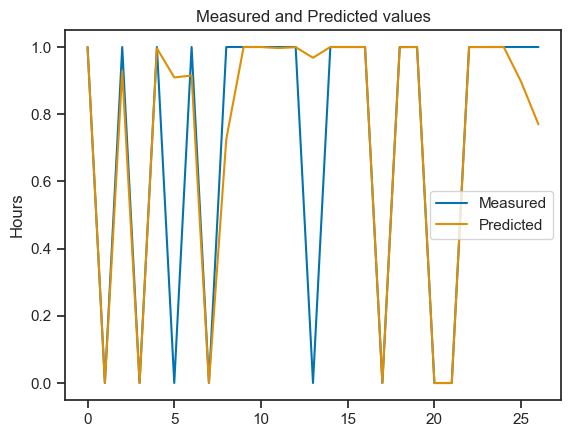

In [108]:
import matplotlib.pyplot as plt
plt.plot(y_test, label="Measured")
plt.plot(predictions, label='Predicted')
plt.legend()
plt.ylabel("Hours")
plt.title("Measured and Predicted values")
plt.show()

#### Model evaluation

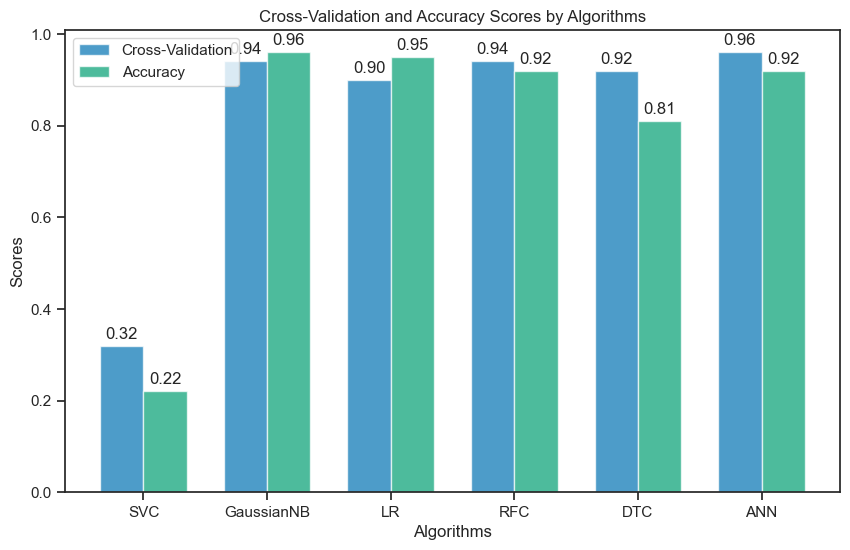

In [109]:
algorithms = ["SVC", "GaussianNB", "LR", "RFC", "DTC", "ANN"]
cross_validation = [0.32, 0.94, 0.90, 0.94, 0.92, 0.96]
accuracy = [0.22, 0.96, 0.95, 0.92, 0.81, 0.92]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Create a bar for cross-validation scores
index = np.arange(len(algorithms))
bar1 = ax.bar(index, cross_validation, bar_width, label='Cross-Validation', alpha=0.7, color='b')

# Create a bar for accuracy scores
bar2 = ax.bar(index + bar_width, accuracy, bar_width, label='Accuracy', alpha=0.7, color='g')

# Customize the plot
ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Cross-Validation and Accuracy Scores by Algorithms')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(algorithms)
ax.legend()

# Add values on top of the bars
for rect in bar1 + bar2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()